# Article 2


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn import svm
# For Model Evaluation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc 



In [56]:
import pandas as pd

data = pd.read_excel("chronic_kidney_disease1.1.xlsx")

data 

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [57]:
data= data.replace('?',np.nan)


In [58]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [59]:
#formatting dataframe by replacing strings in int
replacements = {
    'poor' : 0.0,
    'good' : 1.0,
    'normal' : 1.0,
    'abnormal' : 0.0,
    'notpresent' : 0.0,
    'present' : 1.0,
    'yes' : 1.0,
    'no' : 0.0,
    'ckd' : 1.0,
    'ckd\t' : 1.0,
    'notckd' : 0.0
}
df_num = data.replace(replacements)
df_num

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# numerical

In [60]:
data1=df_num.drop(["sg","al","su","rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane"],axis=1)
X = data1.loc[:, data1.columns != 'class']
X = X.apply(pd.to_numeric, errors='coerce')
data1=X.fillna(X.mean())

# nominal

In [61]:
data2=df_num.drop(["age","bp","bgr","bu","sc","sod","pot","hemo","wbcc","rbcc","pcv"],axis=1)
X1 = data2.loc[:, data2.columns != 'class']
X1 = X1.apply(pd.to_numeric, errors='coerce')
data2=X1.fillna(X1.mode().iloc[0])

In [62]:
data3=pd.concat([data1,data2], axis=1, join='inner')
y = df_num['class']


In [63]:
data4=pd.concat([data3,y], axis=1, join='inner')
data4

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:
data4.isna().sum()

age      0
bp       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

<AxesSubplot:>

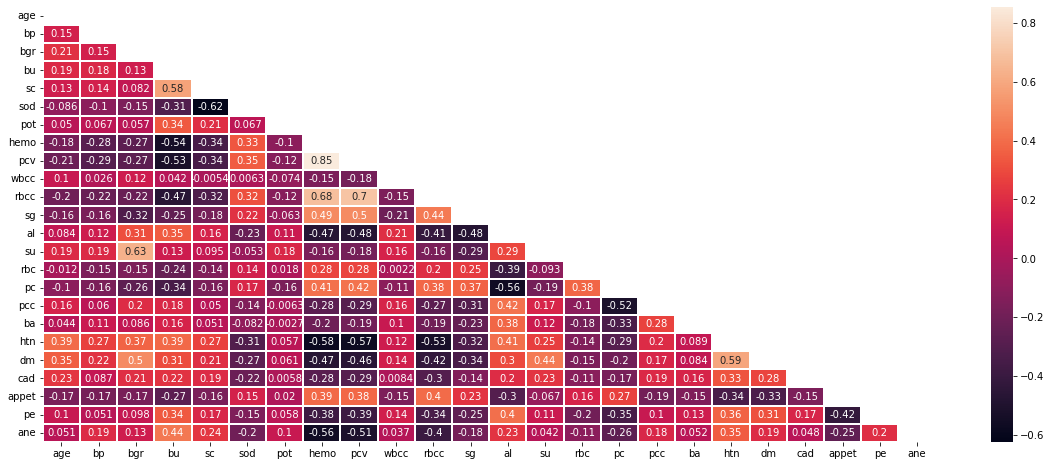

In [65]:
plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(data3.corr()))
sns.heatmap(data3.corr(), annot=True, linewidths=0.2, mask=mask)

# feature selection(RFE)

In [66]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

Optimal number of features : 12


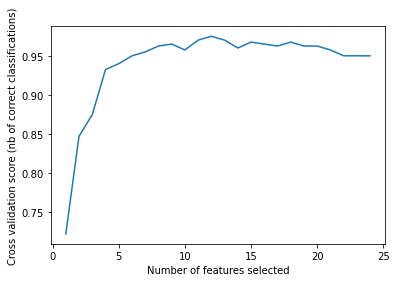

[ 9  6  8  7  1  5  1  1  3 10  1  4  1  1  1  1 11 12  1  1 13  1  1  2]


In [67]:
# rfecv for classification
svc = SVC(kernel="linear")

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(data3, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plotting number of features and cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
print(rfecv.ranking_)

In [68]:
cols = list(data3.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(data3,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['hemo', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'ane'],
      dtype='object')


In [69]:
data3= data3[['hemo', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'ane']]
data5=pd.concat([data3,y], axis=1, join='inner')
data5


,hemo,sg,al,rbc,pc,pcc,ba,htn,dm,cad,appet,ane,class
0,15.4,1.020,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1,11.3,1.020,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,9.6,1.010,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,11.2,1.005,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,11.6,1.010,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,15.7,1.020,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
396,16.5,1.025,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
397,15.8,1.020,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
398,14.2,1.025,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
X = data5.drop("class", axis=1)
y = data5["class"]
display(X)
display(y)

,hemo,sg,al,rbc,pc,pcc,ba,htn,dm,cad,appet,ane
0,15.4,1.020,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,11.3,1.020,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.6,1.010,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,11.2,1.005,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,11.6,1.010,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,15.7,1.020,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
396,16.5,1.025,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
397,15.8,1.020,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
398,14.2,1.025,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 400, dtype: float64

# Decision tree


In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [72]:
from sklearn.tree import DecisionTreeClassifier
modeldt =  DecisionTreeClassifier()

In [73]:
modeldt.fit(x_train, y_train)

DecisionTreeClassifier()

In [74]:
y_preddt = modeldt.predict(x_test)
y_preddt

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0.])

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
CMDT=confusion_matrix(y_test,y_preddt)
CMDT=np.array(CMDT, dtype=int)
CMDT

array([[44,  0],
       [ 0, 76]])

<AxesSubplot:>

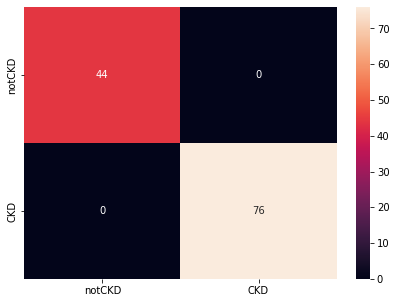

In [76]:

df_cm = pd.DataFrame(CMDT, index = [i for i in ["notCKD","CKD"]],
                         columns = [i for i in ["notCKD", "CKD"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [122]:
print(classification_report(y_test, y_preddt))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        44
         1.0       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [123]:
dtc_acc = accuracy_score(Y_test, Y_pred)

print(dtc_acc)




0.9916666666666667


In [78]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(modeldt.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(modeldt.score(x_test,y_test)))

Training set score: 0.9964
Test set score: 1.0000


In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

In [80]:

accuracy = accuracy_score(y_test,y_preddt)
print('Accuracy: %f' % accuracy)
accuracy = balanced_accuracy_score(y_test,y_preddt)
print('Balanced_Accuracy: %f' % accuracy)
precision = precision_score(y_test,y_preddt)
print('Precision: %f' % precision)
recall = recall_score(y_test,y_preddt)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_preddt)
print('F1 score: %f' % f1)

Accuracy: 1.000000
Balanced_Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [82]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# SVM 

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [84]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [85]:
Y_pred = clf_svm.predict(x_test)

svm_acc = accuracy_score(y_test, Y_pred)

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        44
         1.0       0.99      0.99      0.99        76

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [86]:
mean_absolute_error(y_test,Y_pred)

0.016666666666666666

In [87]:
mean_squared_error(y_test,Y_pred, squared=False)

0.12909944487358055

## Confusion Matrix

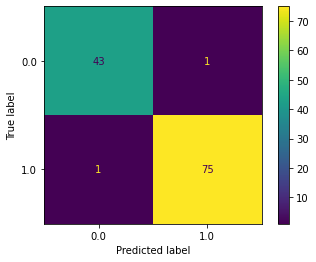

In [88]:

cm1 = confusion_matrix(y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_svm.classes_)
disp.plot()
plt.show()

##  ROC

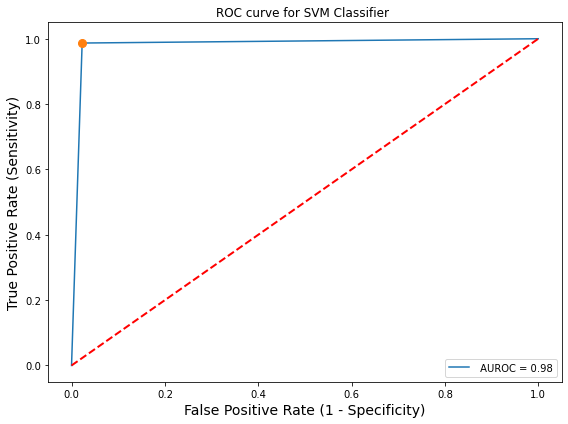

In [89]:

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for SVM Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# KNN


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC



In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [92]:
def Euclidean_dist(pt1,pt2):
    distance=0.0
    for i in range(len(pt1)):
        distance += (pt1[i]-pt2[i])**2
    return math.sqrt(distance)

In [93]:
def Nearest_neighbors(train,test_obs,n):
    neighbor_distance= []
    for i in range(len(train)):
        l1=list(train.iloc[i,:])+[Euclidean_dist(train.iloc[i,:-1],test_obs)]
        neighbor_distance= neighbor_distance+[l1]
    neighbor_distance.sort(key=lambda x: x[-1])
    nearest_neighbors= [neighbor_distance[i] for i in range(0,n)]
    y_pred= [i[-2] for i in nearest_neighbors]
    return(int(max(y_pred,key=y_pred.count)))

In [94]:
def Prediction(train,test_obs,n):
    
    NN=Nearest_neighbors(train,test_obs,3)
    M= [i[n-1] for i in NN]
    
    return(test_obs+[max(M)])

In [95]:
def Normalize(data):
    df1=[]
    for i in range(len(data.columns)):
        z=[]
        z= [(k-np.mean(data5.iloc[:,i]))/np.std(data5.iloc[:,i]) for k in data5.iloc[:,i]]
        df1.append(z)
    df1=pd.DataFrame(df1)
    df1=df1.T
    df1.columns=data.columns
    return(df1)

In [96]:
def F_score(Act,Pred):
    ConfusionMatrix= confusion_matrix(Act,Pred)
    return((2*ConfusionMatrix[1,1])/(2*ConfusionMatrix[1,1]+ConfusionMatrix[1,0]+ConfusionMatrix[0,1]))

In [97]:
def Accuracy(Act,Pred):
    ConfusionMatrix= confusion_matrix(Act,Pred)
    #return(ConfusionMatrix)
    return((ConfusionMatrix[0,0]+ConfusionMatrix[1,1])/(len(Act)))

In [98]:
X=data5.drop(columns='class')
Y=data5['class']

In [99]:
X= Normalize(X)

In [100]:
#A sneakpeak of Normalized data
X.head()

,hemo,sg,al,rbc,pc,pcc,ba,htn,dm,cad,appet,ane
0,1.059271,0.421486,0.076249,0.36489,0.484322,-0.342518,-0.241249,1.311903,1.408927,-0.304789,0.511693,-0.420084
1,-0.452097,0.421486,2.363728,0.36489,0.484322,-0.342518,-0.241249,-0.762252,-0.709760,-0.304789,0.511693,-0.420084
2,-1.078762,-1.421074,0.838742,0.36489,0.484322,-0.342518,-0.241249,-0.762252,1.408927,-0.304789,-1.954297,2.380476
3,-0.488960,-2.342354,2.363728,0.36489,-2.064742,2.919556,-0.241249,1.311903,-0.709760,-0.304789,-1.954297,2.380476
4,-0.341509,-1.421074,0.838742,0.36489,0.484322,-0.342518,-0.241249,-0.762252,-0.709760,-0.304789,0.511693,-0.420084


In [101]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=42)


In [102]:
X_train=X_train.join(Y_train)

In [103]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape,sep='\n')


(280, 13)
(280,)
(120, 12)
(120,)


In [104]:
Acc=[]
for j in range(1,20):
    pred=[]
    for i in range(len(X_test)):
        pred.append([Nearest_neighbors(X_train,X_test.iloc[i,:],j)])
    Acc= Acc+([Accuracy(Y_test,pred)])

In [105]:
Acc

[0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333]

The accuracy is maximum at k=1.

In [106]:
pred=[]
for i in range(len(X_test)):
    pred.append(Nearest_neighbors(X_train,X_test.iloc[i,:],Acc.index(max(Acc))+1))
    
X_test['Pred']= pred
X_test['class']= Y_test

In [121]:
from sklearn.metrics import classification_report
knn_acc = classification_report(X_test['class'], X_test['Pred'])
print(knn_acc)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        44
         1.0       0.99      1.00      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [124]:
knn_acc = accuracy_score(Y_test, Y_pred)

print(knn_acc)



0.9916666666666667


The model has an accuracy of 99%

In [108]:
pd.crosstab(X_test['class'], X_test['Pred'], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0.0,43,1,44
1.0,0,76,76
All,43,77,120


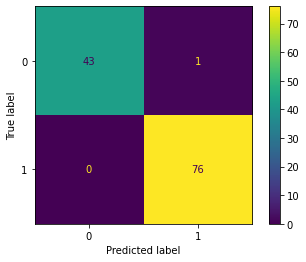

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

Summary from Confusion Matrix:
True Negatives: 43
False Positives: 1
False Negatives: 0
True Positives: 76

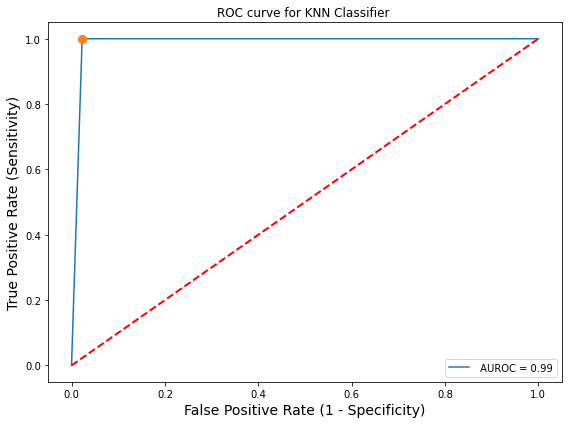

In [110]:
from sklearn.metrics import roc_curve, auc 

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for KNN Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

In [111]:
accuracy = Accuracy(Y_test,pred)
print('Accuracy: %f' % accuracy)
accuracy = balanced_accuracy_score(Y_test,pred)
print('Balanced_Accuracy: %f' % accuracy)
precision = precision_score(Y_test,pred)
print('Precision: %f' % precision)
recall = recall_score(Y_test,pred)
print('Recall: %f' % recall)
f1 = F_score(Y_test,pred)
print('F1 score: %f' % f1)

Accuracy: 0.991667
Balanced_Accuracy: 0.988636
Precision: 0.987013
Recall: 1.000000
F1 score: 0.993464


# Random Forest

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
clf_rand_forest = RandomForestClassifier()
clf_rand_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [113]:
X = X_test.iloc[:, :13].values

#print(clf_rand_forest.predict(X))

Y_pred = clf_rand_forest.predict(X)

rand_forest_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        44
         1.0       0.99      1.00      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [114]:
mean_absolute_error(Y_test,Y_pred)

0.008333333333333333

In [115]:
mean_squared_error(Y_test,Y_pred, squared=False)

0.09128709291752768

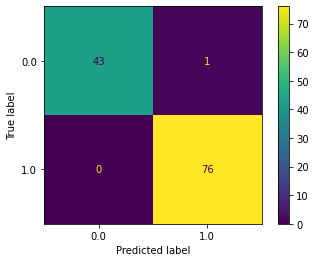

In [116]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_rand_forest.classes_)
disp.plot()
plt.show()

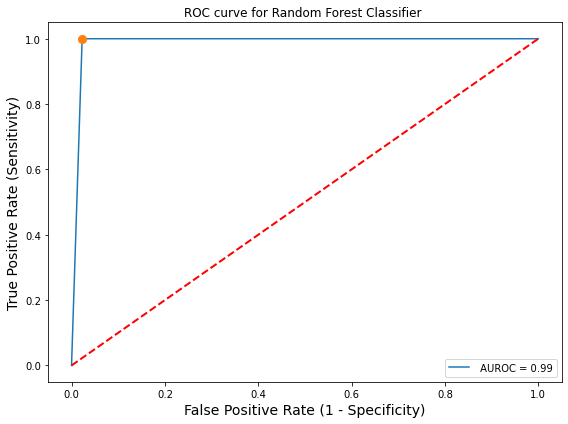

In [117]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Random Forest Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()